In [1]:
%pylab
%matplotlib inline
%load_ext watermark
%watermark -v -m -p numpy,tensorflow

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
CPython 3.5.5
IPython 6.3.1

numpy 1.14.2
tensorflow 1.8.0

compiler   : GCC 7.2.0
system     : Linux
release    : 4.13.0-39-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


1000개의 데이터 포인트를 만듭니다. x1은 평균값을 0으로 갖고 표준편차가 0.55인 정규분포를 생성합니다. y1은 x1의 데이터를 이용해 기울기는 0.1, y 절편은 0.3인 방정식을 이용해 만듭니다. 이때 y 절편에 평균값 0, 표준편차 0.03인 정규분포를 더하여 포인트를 방정식이 만드는 직선의 y축 방향으로 흩어지게 만듭니다.  

In [2]:
num_points = 1000
vectors_set = []
for i in range(num_points):
         x1 = np.random.normal(0.0, 0.55)
         y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
         vectors_set.append([x1, y1])

vectors_set는 list of list, 즉 2차원 배열로 이루어져 있습니다. 2차원의 첫번째 요소를 x_data에 두번째 요소를 y_data로 저장합니다.

In [3]:
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

x, y 좌표에 x_data, y_data 를 사용하여 붉은색 원으로 산포도를 그립니다.

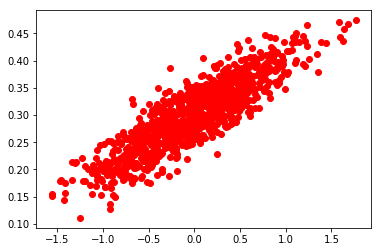

In [4]:
plt.plot(x_data, y_data, 'ro')
plt.show()

텐서플로우 패키지를 로드합니다.

In [5]:
import tensorflow as tf

-1~1 사이의 랜덤한 균등분포 값으로 1차원 엘리먼트가 한개인 가중치 텐서를 만듭니다. 바이어스 텐서는 0으로 초기화된 엘리먼트를 갖는 1차원 텐서입니다.

In [6]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

loss 함수를 정의하고 최적화 방법은 학습속도 0.5인 그래디언트 디센트를 사용합니다.

In [7]:
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

모든 변수를 초기화하고 세션을 시작합니다.

In [8]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

8번 반복하면서 train을 실행시킵니다. 반복마다 W, b 값의 변화를 프린트하고 그래프로 직선의 기울기의 변화를 살펴봅니다.

0 [-0.5625197] [0.28506747] 0.1359211


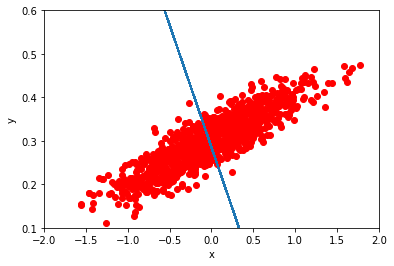

1 [-0.35902774] [0.28995445] 0.06577112


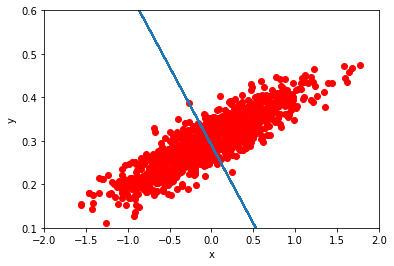

2 [-0.21798937] [0.2934224] 0.032071915


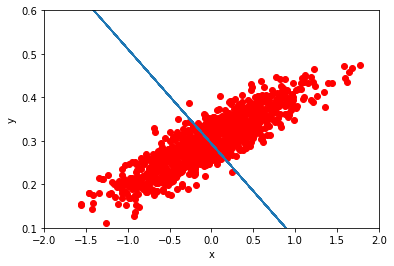

3 [-0.12023564] [0.295826] 0.015883224


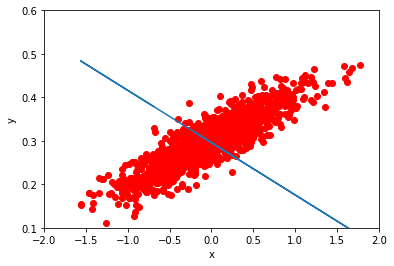

4 [-0.05248252] [0.2974919] 0.008106373


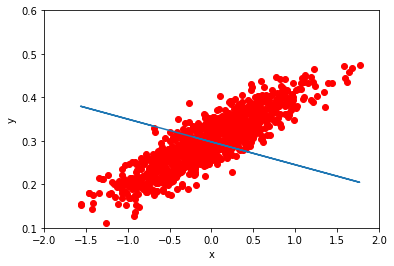

5 [-0.00552281] [0.29864657] 0.0043704673


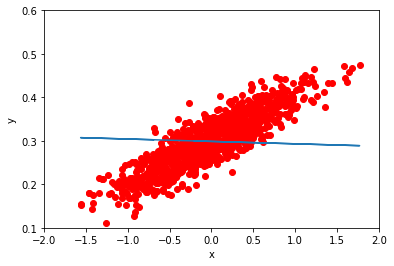

6 [0.02702497] [0.29944688] 0.0025757835


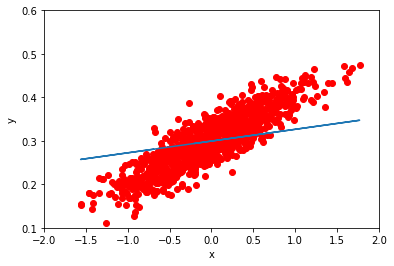

7 [0.04958385] [0.30000156] 0.0017136385


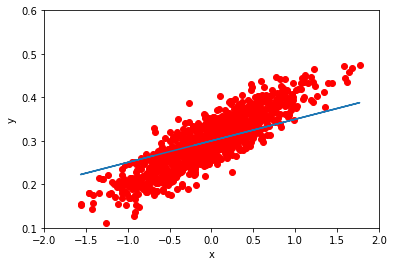

In [9]:
for step in range(8):
    sess.run(train)
    print(step, sess.run(W), sess.run(b), sess.run(loss))
    # 산포도 그리기
    plt.plot(x_data, y_data, 'ro')
    # 직선 그리기
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    # x, y 축 레이블링을 하고 각 축의 최대, 최소값 범위를 지정합니다.
    plt.xlabel('x')
    plt.xlim(-2,2)
    plt.ylim(0.1,0.6)
    plt.ylabel('y')
    plt.show()